## MNIST 2

Continuing on from the previous lesson.  We will try to increase the accuracy by adding another hidden layer to the system.

We will also add some Tensorboard monitoring

### Import libraries

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
# Import MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Load data
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels
X_validation = mnist.validation.images
Y_validation = mnist.validation.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [18]:
# Graphing functions

def display_mnist(input_array, invert = False):
    first_image = []
    if invert:
        first_image = np.array(input_array*255, dtype='uint8')
    else:
        first_image = np.array((1-input_array)*255, dtype='uint8')

    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
def bar_graph(x1,y1):
    probabilities = session.run(result, feed_dict={x_data: x1, y_data: y1})
    label = session.run(tf.argmax(y1, 1))
    predicted = session.run(tf.argmax(probabilities, 1))

    print "Actual:",label[0], " Predicted: ", predicted[0]
    display_mnist(x1)
    y=probabilities[0]
    N = len(probabilities[0])
    x = range(N)
    width = 1/1.5
    plt.bar(x, y, width, color="blue")
    plt.show()

Here we will add another layer to the network.  

In [19]:
#Network Parameters
INPUTS = 784       # 28 x 28 = 784 input pixels
HIDDEN_1 = 256     # we will start with a NN with 1 hidden layer and 40 nodes.
HIDDEN_2 = 256     # Second layer added
OUTPUTS = 10       # 10 possible outputs - 0->9

#Training Parameters
epochs = 10000          
display_epochs = 50    
batch_size = 100   
learning_rate = 0.001  

In [20]:
#Use placeholders to pass our input and output data into the system
x_data = tf.placeholder(dtype=tf.float32,shape=[None, INPUTS],name="input")
y_data = tf.placeholder(dtype=tf.float32,shape=[None, OUTPUTS],name="output")

# 2 layer NN Structure

In [21]:
#Structure
# Weights - Input to Hidden 1
weight1 = tf.random_normal([INPUTS, HIDDEN_1])
weight1 = tf.Variable(weight1, name='W1')

bias1 = tf.random_normal([HIDDEN_1])
bias1 = tf.Variable(bias1, name='B1')

#Weights - Hidden 1 to Hidden 2
weight2 = tf.random_normal([HIDDEN_1, HIDDEN_2])
weight2 = tf.Variable(weight2, name='W2')

bias2 = tf.random_normal([HIDDEN_2])
bias2 = tf.Variable(bias2, name='B2')

# Weights - Hidden 2 to Output
weight3 = tf.random_normal([HIDDEN_2, OUTPUTS])
weight3 = tf.Variable(weight3, name='W2')

bias3 = tf.random_normal([OUTPUTS])
bias3 = tf.Variable(bias3, name='B2')

#input to hidden 1
hidden1 = tf.nn.relu(tf.add(tf.matmul(x_data, weight1), bias1))

#hidden 1 to hidden 2
hidden2 = tf.nn.relu(tf.add(tf.matmul(hidden1, weight2), bias2))

#hidden2 to output
y = tf.add(tf.matmul(hidden2, weight3), bias3)


#apply final activation
result = tf.nn.softmax(y)


#loss and training
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_data))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [22]:
#Training
init = tf.global_variables_initializer()
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
session.run(init)

for step in range(epochs):
    #get a random batch of data
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    #run the training and the loss
    out_training , out_loss = session.run([train,loss],feed_dict={x_data: batch_x, y_data: batch_y})

    break
    
    if step % display_epochs == 0:
        print("Step: %04d error: %g "%(step,out_loss))

In [23]:
#Calculate Accuracy

print "Complete"
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_data, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
accuracy = session.run(accuracy,feed_dict={x_data: mnist.test.images, y_data: mnist.test.labels})
print "Accuracy:", "{:.2%}".format(accuracy)

Complete
Accuracy: 7.30%


## Simplify

Lets use the tf.contrib.fully_connected operation to simplify the code.

In [24]:
#close previous session 
session.close()

# reset tensorboard
tf.reset_default_graph()

In [25]:
#Use placeholders to pass our input and output data into the system
x_data = tf.placeholder(dtype=tf.float32,shape=[None, INPUTS],name="input")
y_data = tf.placeholder(dtype=tf.float32,shape=[None, OUTPUTS],name="output")

# 2 hidden layers
def multilayer_perceptron2(x):
    #inside this, variables 'fc1/weights' and 'fc1/bias' are defined
    fc1 = tf.contrib.layers.fully_connected(x, HIDDEN_1, activation_fn=tf.nn.relu)
    tf.summary.histogram('fc1', fc1)
    fc2 = tf.contrib.layers.fully_connected(fc1, HIDDEN_2, activation_fn=tf.nn.relu)
    tf.summary.histogram('fc2', fc2)
    out = tf.contrib.layers.fully_connected(fc2, OUTPUTS, activation_fn=None)
    return out

# 5 hidden layers
def multilayer_perceptron5(x):
    fc1 = tf.contrib.layers.fully_connected(x, HIDDEN_1, activation_fn=tf.nn.relu)
    fc2 = tf.contrib.layers.fully_connected(fc1, HIDDEN_2, activation_fn=tf.nn.relu)
    fc3 = tf.contrib.layers.fully_connected(fc2, HIDDEN_2, activation_fn=tf.nn.relu)
    fc4 = tf.contrib.layers.fully_connected(fc3, HIDDEN_2, activation_fn=tf.nn.relu)
    fc5 = tf.contrib.layers.fully_connected(fc4, HIDDEN_2, activation_fn=tf.nn.relu)
    out = tf.contrib.layers.fully_connected(fc5, OUTPUTS, activation_fn=None)
    return out


def multilayer_perceptron10(x):
    fc1 = tf.contrib.layers.fully_connected(x, HIDDEN_1, activation_fn=tf.nn.relu)
    fc2 = tf.contrib.layers.fully_connected(fc1, HIDDEN_2, activation_fn=tf.nn.relu)
    fc3 = tf.contrib.layers.fully_connected(fc2, HIDDEN_2, activation_fn=tf.nn.relu)
    fc4 = tf.contrib.layers.fully_connected(fc3, HIDDEN_2, activation_fn=tf.nn.relu)
    fc5 = tf.contrib.layers.fully_connected(fc4, HIDDEN_2, activation_fn=tf.nn.relu)
    fc6 = tf.contrib.layers.fully_connected(fc5, HIDDEN_2, activation_fn=tf.nn.relu)
    fc7 = tf.contrib.layers.fully_connected(fc6, HIDDEN_2, activation_fn=tf.nn.relu)
    fc8 = tf.contrib.layers.fully_connected(fc7, HIDDEN_2, activation_fn=tf.nn.relu)
    fc9 = tf.contrib.layers.fully_connected(fc8, HIDDEN_2, activation_fn=tf.nn.relu)
    fc10 = tf.contrib.layers.fully_connected(fc9, HIDDEN_2, activation_fn=tf.nn.relu)
    out = tf.contrib.layers.fully_connected(fc10, OUTPUTS, activation_fn=None)
    return out


y = multilayer_perceptron2(x_data)


result = tf.nn.softmax(y)


In [26]:
# Training

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_data))
tf.summary.scalar('loss', loss)
optimizer = tf.train.AdamOptimizer(learning_rate)
with tf.name_scope('train'):
    train = optimizer.minimize(loss)

    
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
session.run(tf.global_variables_initializer())
merged = tf.summary.merge_all()
summary_writer = tf.summary.FileWriter('./my_graph', session.graph)

In [27]:
for step in range(epochs):
    #get a random batch of data
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    #run the training and the loss
    out_training , out_loss, out_merged = session.run([train,loss, merged],feed_dict={x_data: batch_x, y_data: batch_y})

    if step % display_epochs == 0:
        summary_writer.add_summary(out_merged,step)
        print("Step: %04d error: %g "%(step,out_loss))

Step: 0000 error: 2.37557 
Step: 0050 error: 0.375432 
Step: 0100 error: 0.204736 
Step: 0150 error: 0.209253 
Step: 0200 error: 0.25964 
Step: 0250 error: 0.179671 
Step: 0300 error: 0.109057 
Step: 0350 error: 0.131476 
Step: 0400 error: 0.07469 
Step: 0450 error: 0.0606815 
Step: 0500 error: 0.158667 
Step: 0550 error: 0.120338 
Step: 0600 error: 0.0866696 
Step: 0650 error: 0.0464836 
Step: 0700 error: 0.169762 
Step: 0750 error: 0.0708149 
Step: 0800 error: 0.0607378 
Step: 0850 error: 0.149655 
Step: 0900 error: 0.0255741 
Step: 0950 error: 0.0940635 
Step: 1000 error: 0.156956 
Step: 1050 error: 0.158101 
Step: 1100 error: 0.0447659 
Step: 1150 error: 0.0267015 
Step: 1200 error: 0.0449522 
Step: 1250 error: 0.0342147 
Step: 1300 error: 0.0775534 
Step: 1350 error: 0.0714634 
Step: 1400 error: 0.0811402 
Step: 1450 error: 0.053788 
Step: 1500 error: 0.038386 
Step: 1550 error: 0.116146 
Step: 1600 error: 0.0182859 
Step: 1650 error: 0.0267062 
Step: 1700 error: 0.0730712 
Step: 

In [28]:
print "Complete"
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_data, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
accuracy = session.run(accuracy,feed_dict={x_data: mnist.test.images, y_data: mnist.test.labels})
print "Accuracy:", "{:.2%}".format(accuracy)


Complete
Accuracy: 98.02%


Actual: 0  Predicted:  0


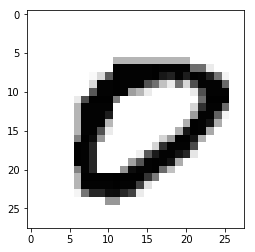

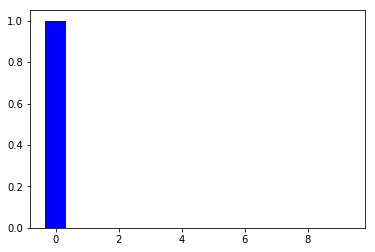

Actual: 6  Predicted:  6


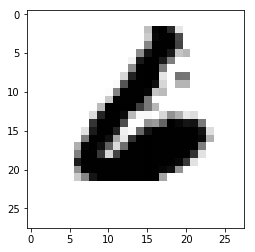

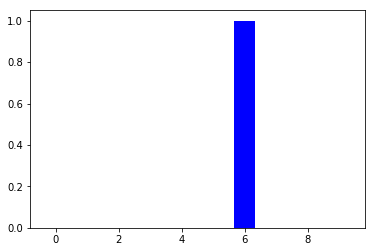

Actual: 8  Predicted:  8


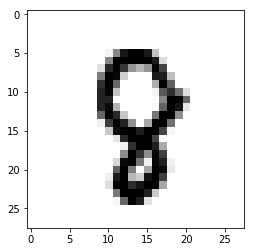

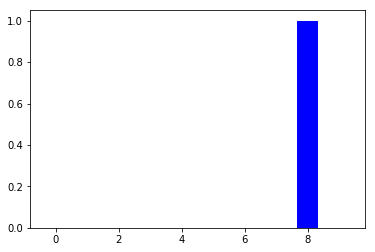

Actual: 0  Predicted:  0


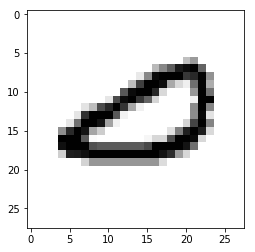

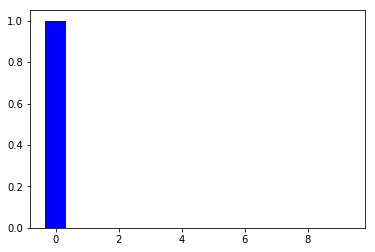

Actual: 6  Predicted:  6


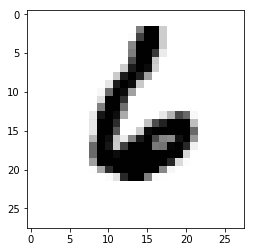

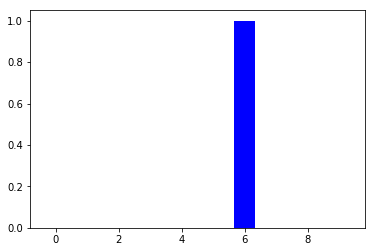

Actual: 1  Predicted:  1


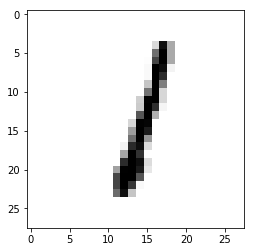

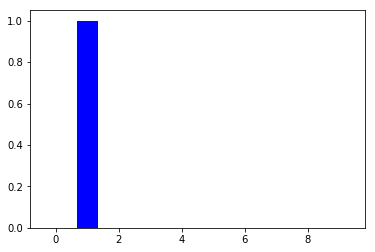

Actual: 2  Predicted:  2


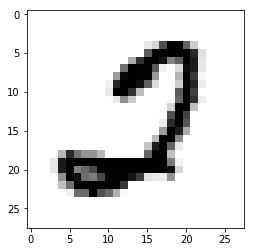

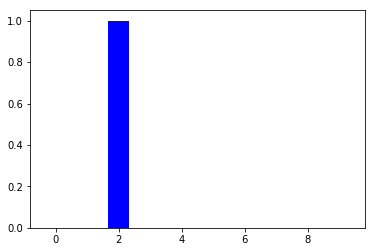

Actual: 7  Predicted:  7


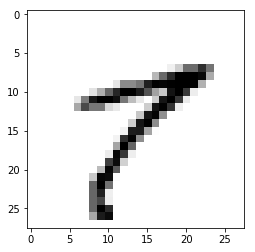

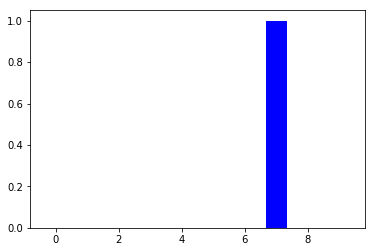

Actual: 0  Predicted:  0


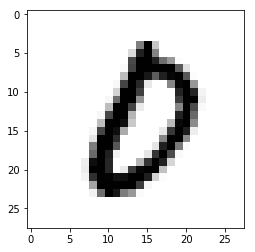

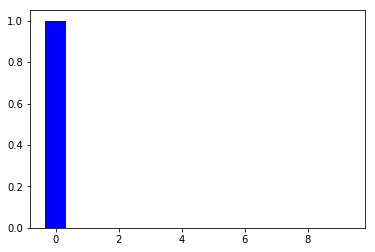

Actual: 2  Predicted:  2


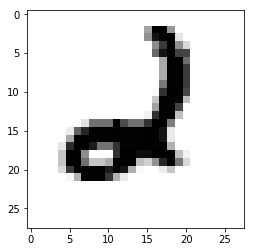

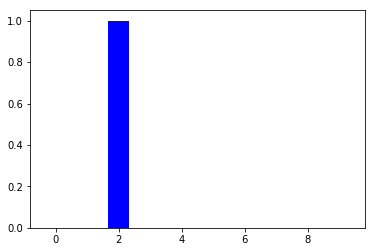

In [29]:
#test some inputs
for i in range(10):
    x1, y1 = mnist.test.next_batch(1)
    bar_graph(x1,y1)


## Bad Inputs

We will change the code to simplify even more and add some Tensorboard content.

Actual: 0  Predicted:  5


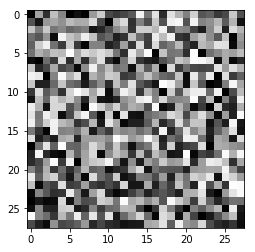

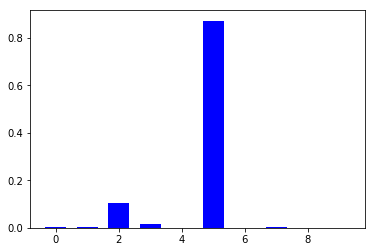

In [31]:
a = np.random.uniform(size=(1,784), low=0, high=1)  #generate random data
b = [[1,0,0,0,0,0,0,0,0,0]]    # pass in 0
bar_graph(a,b)

In [16]:
#close previous session 
session.close()
